# Exploratory Data Analysis

This provides an overall __DATA__ visualizing.

Make sure to __INSTALL__ libraries before compiling the code, __it takes several minutes__ to create the html

In [ ]:
#!pip install ydata_profiling
#!pip install ipywidgets
from ydata_profiling import ProfileReport
import ipywidgets as widgets
import pandas as pd
df = pd.read_csv("assets/cleaned_train.csv")
profile_obj = ProfileReport(df, title='How much did it rain')
profile_obj.to_file('html-files/How much did it rain.html')
profile_obj

In [1]:
import pandas as pd


file_path = 'assets/cleaned_train.csv'  
df = pd.read_csv(file_path)

# Create a new feature: product of 'Ref' and 'radardist_km'
df['Ref_radardist_product'] = df['Ref'] * df['radardist_km']


output_path = 'assets/cleaned_train_with_features.csv'  
df.to_csv(output_path, index=False)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar datos
data = pd.read_csv('assets/cleaned_train.csv')

# Selección de características y variable objetivo
X = data[['Ref', 'RefComposite', 'RhoHV', 'Zdr', 'Kdp']]
y = data['Expected']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predicción para un día específico
new_data = pd.DataFrame({'Ref': [10], 'RefComposite': [15], 'RhoHV': [0.8], 'Zdr': [0.3], 'Kdp': [0.2]})
rainfall_prediction = model.predict(new_data)
print(f"Predicted Rainfall: {rainfall_prediction[0]} mm")

Mean Squared Error: 30188.715910455707
Predicted Rainfall: 29.190574896210194 mm


# Lluvia predicha vs observada

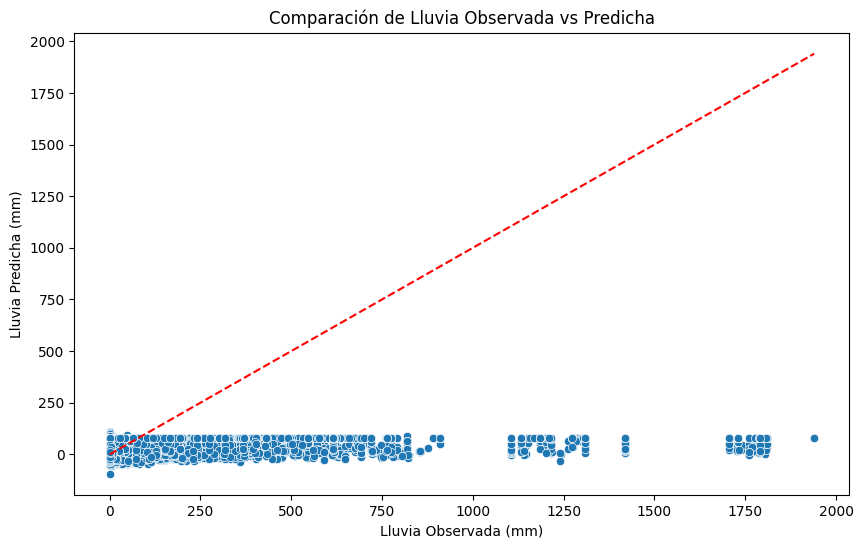

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar datos
data = pd.read_csv('assets/cleaned_train.csv')

# Selección de características y variable objetivo
X = data[['Ref', 'RefComposite', 'RhoHV', 'Zdr', 'Kdp']]
y = data['Expected']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Crear un DataFrame para los resultados
results = pd.DataFrame({'Observed': y_test, 'Predicted': y_pred})

# Gráfico de comparación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Observed', y='Predicted', data=results)
plt.plot([0, results['Observed'].max()], [0, results['Observed'].max()], 'r', linestyle='--')
plt.xlabel('Lluvia Observada (mm)')
plt.ylabel('Lluvia Predicha (mm)')
plt.title('Comparación de Lluvia Observada vs Predicha')
plt.show()

# Retrasos predichos segun la cantidad de lluvia esperada

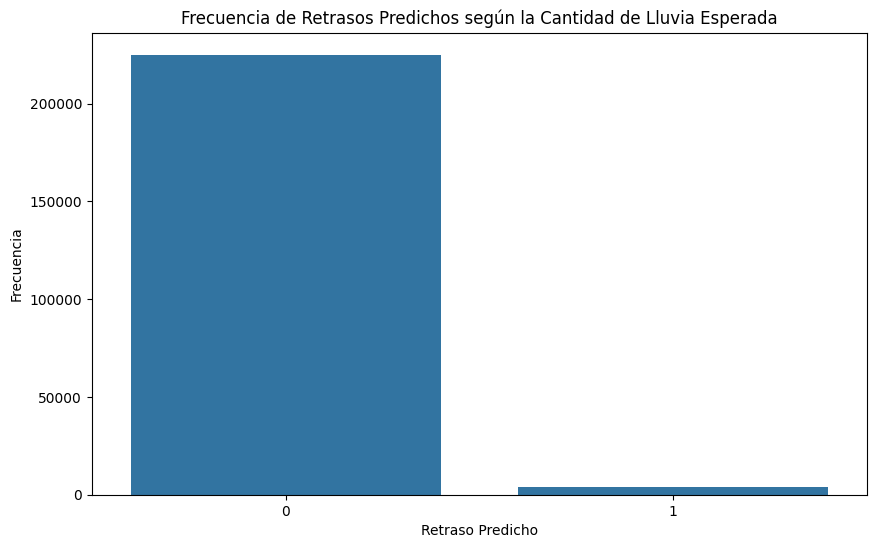

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Cargar datos y agregar una columna de retraso ficticia para el ejemplo
data = pd.read_csv('assets/cleaned_train.csv')
data['delay'] = data['Expected'].apply(lambda x: 1 if x > 50 else 0)  # Supongamos que un retraso ocurre si Expected > 50

# Selección de características y variable objetivo
X = data[['Ref', 'RefComposite', 'RhoHV', 'Zdr', 'Kdp']]
y = data['delay']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predicción de retrasos en función del clima actual
delay_pred = model.predict(X_test)

# Crear un DataFrame para los resultados
results = pd.DataFrame({'Expected Rainfall': X_test['Ref'], 'Predicted Delay': delay_pred})

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Delay', data=results)
plt.xlabel('Retraso Predicho')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Retrasos Predichos según la Cantidad de Lluvia Esperada')
plt.show()

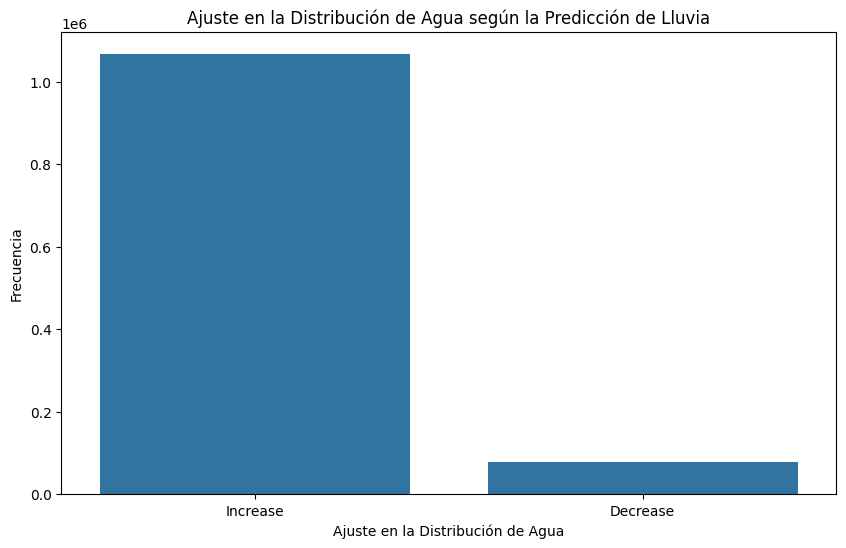

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
rainfall_prediction = pd.read_csv('assets/cleaned_train.csv')

# Ajustar distribución de agua (ejemplo simplificado)
distribution_plan = []
for index, row in rainfall_prediction.iterrows():
    if row['Expected'] > 50:
        distribution_plan.append({'Id': row['Id'], 'water_supply': 'Decrease'})
    else:
        distribution_plan.append({'Id': row['Id'], 'water_supply': 'Increase'})

distribution_plan = pd.DataFrame(distribution_plan)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='water_supply', data=distribution_plan)
plt.xlabel('Ajuste en la Distribución de Agua')
plt.ylabel('Frecuencia')
plt.title('Ajuste en la Distribución de Agua según la Predicción de Lluvia')
plt.show()